## Read in the dataset

In [1]:
import pandas as pd
import numpy as np
df_car = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data',header=None)
df_car.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'labels']
df_car

,buying,maint,doors,persons,lug_boot,safety,labels
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [2]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   labels    1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [3]:
df_car.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
labels      0
dtype: int64

## Feature ordinal encoding
Let's see what is in the features

In [4]:
df_car.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'labels'], dtype='object')

In [5]:
print(df_car['buying'].unique())
print(df_car['maint'].unique())
print(df_car['doors'].unique())
print(df_car['persons'].unique())
print(df_car['lug_boot'].unique())
print(df_car['safety'].unique())

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['2' '3' '4' '5more']
['2' '4' 'more']
['small' 'med' 'big']
['low' 'med' 'high']


在這些Feature之中，我們發現幾乎都為Ordinal的Feature。如vhigh, med, low,彼此之間就存在著大小關係。人數也相同，因此我們手動去Map這些ordinal feature.

In [6]:
prize_mapping = {'low': 0, 'med': 1, 'high': 2, 'vhigh': 3}
doors_mapping = {'2': 2, '3': 3, '4': 4, '5more': 5}
persons_mapping = {'2': 2, '4': 4, 'more': 5}
lug_boot_mapping = {'small': 0, 'med': 1, 'big': 2}
safety_mapping = {'low': 0, 'med': 1, 'high': 2}
df_car['buying'] = df_car['buying'].map(prize_mapping)
df_car['maint'] = df_car['maint'].map(prize_mapping)
df_car['doors'] = df_car['doors'].map(doors_mapping)
df_car['persons'] = df_car['persons'].map(persons_mapping)
df_car['lug_boot'] = df_car['lug_boot'].map(lug_boot_mapping)
df_car['safety'] = df_car['safety'].map(safety_mapping)
df_car

,buying,maint,doors,persons,lug_boot,safety,labels
0,3,3,2,2,0,0,unacc
1,3,3,2,2,0,1,unacc
2,3,3,2,2,0,2,unacc
3,3,3,2,2,1,0,unacc
4,3,3,2,2,1,1,unacc
...,...,...,...,...,...,...,...
1723,0,0,5,5,1,1,good
1724,0,0,5,5,1,2,vgood
1725,0,0,5,5,2,0,unacc
1726,0,0,5,5,2,1,good


Then y

In [7]:
from sklearn.preprocessing import LabelEncoder

# print('Class Labels before preprocessing:', np.unique(df_car['labels'].values))
unique, counts = np.unique(df_car['labels'], return_counts=True)
print('Class Labels before preprocessing:', dict(zip(unique, counts)))
le = LabelEncoder()
df_car['labels'] = le.fit_transform(df_car['labels'])
unique, counts = np.unique(df_car['labels'], return_counts=True)
print("Class Label after transforming", dict(zip(unique, counts)))

Class Labels before preprocessing: {'acc': 384, 'good': 69, 'unacc': 1210, 'vgood': 65}
Class Label after transforming {0: 384, 1: 69, 2: 1210, 3: 65}


## Split X and y

In [8]:
# first extract the labels
y = df_car['labels'].values
# extract the features
X = df_car.drop(columns = ['labels']).values
print('Class Labels:', np.unique(y))
print('Corresponding names:', le.inverse_transform(np.unique(y)))

Class Labels: [0 1 2 3]
Corresponding names: ['acc' 'good' 'unacc' 'vgood']


從以上來看我們可以發現大部分的Feature都是離散的，這也就代表Decision Tree或Random Forest最適合拿來當作我們的Model。因此在這裡我選擇Random Forest。

# Question 1

## Map y for question 1
Since "unacc", "acc" and "good", "vgood" belongs to the same class, we need to do additional mapping 

'acc': 0, 'good': 1, 'unacc': 2, 'vgood': 3

In [9]:
# mapping the labels for question 1
q1map = {0: 0, 2: 0, 1: 1, 3: 1}
y1 = df_car['labels'].map(q1map)
unique, counts = np.unique(y1, return_counts=True)
dict(zip(unique, counts))

{0: 1594, 1: 134}

## Seperating test and Training Datasets
Using the library from sklearn

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.3, random_state=0, stratify=y1)

直接無腦用Random Forest訓練一次

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

forest = RandomForestClassifier(criterion='gini', n_estimators=500, random_state=1, n_jobs=-1)
forest.fit(X_train, y1_train)
y1_pred = forest.predict(X_test)
print('The results of our best model')
print('Missclassified examples: %d' %(y1_test != y1_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y1_test, y1_pred))
print('Precision: %.3f' %precision_score(y_true=y1_test, y_pred=y1_pred))
print('Recall: %.3f' %recall_score(y_true=y1_test, y_pred=y1_pred))
print('F1: %.3f' %f1_score(y_true=y1_test, y_pred=y1_pred))

The results of our best model
Missclassified examples: 6
Accuracy: 0.988
Precision: 0.947
Recall: 0.900
F1: 0.923


## Draw the learning curve

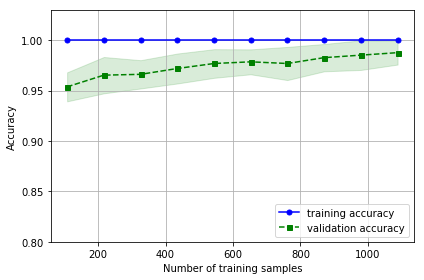

In [12]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
train_sizes, train_scores, test_scores = learning_curve(estimator=forest, X=X_train, y=y1_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')

plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

## Print the confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
confmat = confusion_matrix(y_true=y1_test, y_pred=y1_pred)
print(confmat)

[[477   2]
 [  4  36]]


Text(0, 0.5, 'True label')

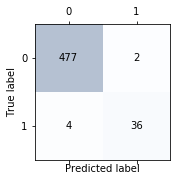

In [14]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x = j, y = i, s = confmat[i, j], va = 'center', ha = 'center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

## Let's try to train with SVM

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score

pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))
param_range = [0.001, 0.0001, 0.01, 0.99, 1.0, 10.0, 100.0, 1000.0, 2, 3, 4, 5, 0.9, 0.8, 1.1]

# this will also include the kernel svm
# param_grid = [{'svc__C': param_range, 'svc__kernel': ['linear']}, {'svc__C': param_range, 'svc__gamma': param_range, 'svc__kernel': ['rbf']}]

# this only includes linear svm
param_grid = [{'svc__C': param_range, 'svc__kernel': ['linear']}]
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=2)
scores = cross_val_score(gs, X_train, y1_train, scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
gs = gs.fit(X_train, y1_train)
print(gs.best_params_)
clf = gs.best_estimator_


CV accuracy: 0.964 +/- 0.006
{'svc__C': 0.99, 'svc__kernel': 'linear'}


## Plot the learning curve of the SVM model

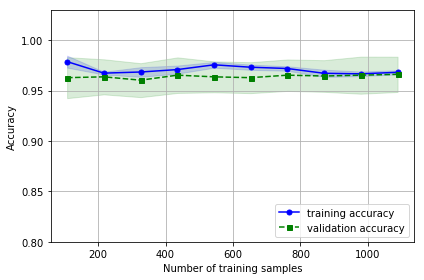

In [16]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=clf, X=X_train, y=y1_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')

plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

## Test our SVM model

In [17]:
clf.fit(X_train, y1_train)
y1_pred = clf.predict(X_test)
print('The results of our best model')
print('Missclassified examples: %d' %(y1_test != y1_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y1_test, y1_pred))
print('Precision: %.3f' %precision_score(y_true=y1_test, y_pred=y1_pred))
print('Recall: %.3f' %recall_score(y_true=y1_test, y_pred=y1_pred))
print('F1: %.3f' %f1_score(y_true=y1_test, y_pred=y1_pred))

The results of our best model
Missclassified examples: 16
Accuracy: 0.969
Precision: 0.800
Recall: 0.800
F1: 0.800


## Confusion Matrix

In [18]:
confmat = confusion_matrix(y_true=y1_test, y_pred=y1_pred)
print(confmat)

[[471   8]
 [  8  32]]


Text(0, 0.5, 'True label')

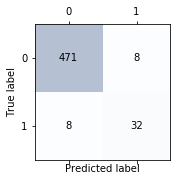

In [19]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x = j, y = i, s = confmat[i, j], va = 'center', ha = 'center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

# Question 2

## Seperating training and testing datasets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

## Use randomforest to train the data

In [21]:
forest = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print('The results of our best model')
print('Missclassified examples: %d' %(y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

The results of our best model
Missclassified examples: 13
Accuracy: 0.975


## Draw the learning curve

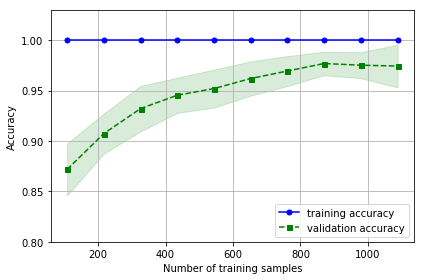

In [22]:
train_sizes, train_scores, test_scores = learning_curve(estimator=forest, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')

plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

Our model suffers from overfitting

## Try the SVM model

In [23]:
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))
param_range = [0.001, 0.0001, 0.01, 0.99, 1.0, 10.0, 100.0, 1000.0, 2, 3, 4, 5, 0.9, 0.8, 1.1]

# this will also include the kernel svm
param_grid = [{'svc__C': param_range, 'svc__kernel': ['linear']}, {'svc__C': param_range, 'svc__gamma': param_range, 'svc__kernel': ['rbf']}]

# this only includes linear svm
# param_grid = [{'svc__C': param_range, 'svc__kernel': ['linear']}]

gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=2, n_jobs=-1)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
gs = gs.fit(X_train, y_train)
print(gs.best_params_)
clf = gs.best_estimator_

CV accuracy: 0.975 +/- 0.010
{'svc__C': 4, 'svc__gamma': 0.8, 'svc__kernel': 'rbf'}


## Plot the learning curve of our SVM model

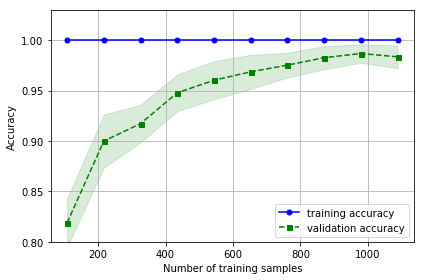

In [24]:
train_sizes, train_scores, test_scores = learning_curve(estimator=clf, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')

plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

## Testing the SVM model

In [25]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('The results of our best model')
print('Missclassified examples: %d' %(y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

The results of our best model
Missclassified examples: 11
Accuracy: 0.979


# Question 3

## Feature Selection
以下我們使用Random forest來觀察Feature的重要性。

 1) maint                          0.206458
 2) doors                          0.195554
 3) buying                         0.174457
 4) safety                         0.156881
 5) persons                        0.137427
 6) lug_boot                       0.129223


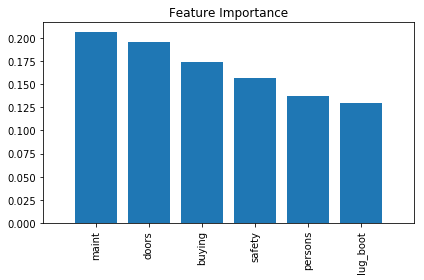

In [26]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
feat_labels = df_car.columns[:-1]
forest = RandomForestClassifier(n_estimators = 500, random_state=1)
forest.fit(X_train, y1_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print('%2d) %-*s %f' %(f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align = 'center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

很不幸的是我們發現各個Feature幾乎都差不多重要。直接抽掉Feature不是一個好作法。我們試試看LDA以及PCA的方法看看。前面除了用kernel svm可以得到很好的結果之外，Random forest的表現也不錯，但有Overfitting的現象，我們嘗試看看LDA以及PCA是否可以解決。

## Trying PCA with SVM

In [34]:
from sklearn.decomposition import PCA
pipe_svc = make_pipeline(StandardScaler(), PCA(n_components=3), SVC(random_state=1))
# pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1), LDA(n_components=2))
param_range = [0.001, 0.0001, 0.01, 0.99, 1.0, 10.0, 100.0, 1000.0, 2, 3, 4, 5, 0.9, 0.8, 1.1]

# this will also include the kernel svm
# param_grid = [{'svc__C': param_range, 'svc__kernel': ['linear']}, {'svc__C': param_range, 'svc__gamma': param_range, 'svc__kernel': ['rbf']}]

# this only includes linear svm
param_grid = [{'svc__C': param_range, 'svc__kernel': ['linear']}]

gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=2, n_jobs=-1)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
gs = gs.fit(X_train, y_train)
print(gs.best_params_)
clf = gs.best_estimator_

CV accuracy: 0.763 +/- 0.050
{'svc__C': 0.99, 'svc__kernel': 'linear'}


We discover that PCA does not do well at our classification problem, hence we try LDA instead.

## SVM with LDA

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)
svc = SVC(random_state=1)
param_range = [0.001, 0.0001, 0.01, 0.99, 1.0, 10.0, 100.0, 1000.0, 2, 3, 4, 5, 0.9, 0.8, 1.1]

# this will also include the kernel svm
param_grid = [{'C': param_range, 'kernel': ['linear']}, {'C': param_range, 'gamma': param_range,  'kernel': ['rbf']}]

# this only includes linear svm
# param_grid = [{'C': param_range, 'kernel': ['linear']}]

gs = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=2, n_jobs=-1)
scores = cross_val_score(gs, X_train_lda, y_train, scoring='accuracy', cv=5, n_jobs=-1)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
gs = gs.fit(X_train_lda, y_train)
print(gs.best_params_)
clf = gs.best_estimator_

CV accuracy: 0.914 +/- 0.014
{'C': 1.0, 'gamma': 10.0, 'kernel': 'rbf'}


That's a much better performance, We try the test data to see whether did it improve the overfitting problem.

## Plotting the decision region

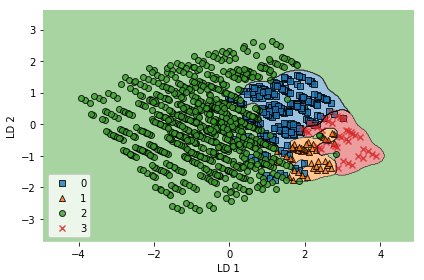

In [29]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train_lda, y_train, clf=clf)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

## Plot the learning curve

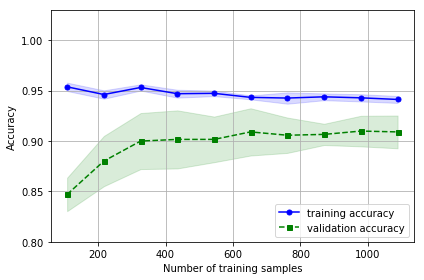

In [30]:
train_sizes, train_scores, test_scores = learning_curve(estimator=clf, X=X_train_lda, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')

plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

## Testing the results

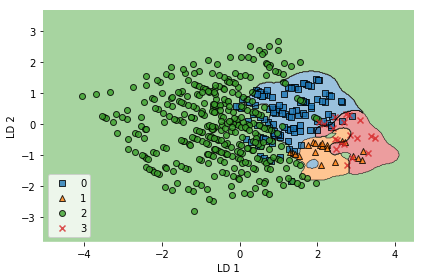

The results of our best model
Missclassified examples: 61
Accuracy: 0.882


In [31]:
plot_decision_regions(X_test_lda, y_test, clf=clf)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()
y_pred = clf.predict(X_test_lda)
print('The results of our best model')
print('Missclassified examples: %d' %(y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

## Trying random forest with LDA

In [32]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
forest = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=1, n_jobs=-1)
forest.fit(X_train_lda, y_train)
y_pred = forest.predict(X_test_lda)

print('The results of our best model')
print('Missclassified examples: %d' %(y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

The results of our best model
Missclassified examples: 66
Accuracy: 0.873


## Plot the learning curve

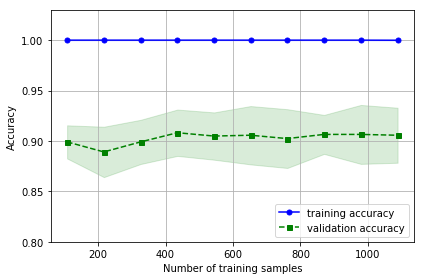

In [33]:
train_sizes, train_scores, test_scores = learning_curve(estimator=forest, X=X_train_lda, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')

plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()